Source publication for dataset: 
https://www.nature.com/articles/s41467-018-02866-0

In [35]:
import numpy as np
import pandas as pd
from copy import deepcopy
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import networkx as nx
import hypernetx as hnx
import model

# Initialization

In [36]:
cell_count = 456
gene_count = 100
infile_dir = "./../data/TEsmESC/"

m = model.HyperGraph(n_cells=cell_count, n_genes=gene_count, infile_dir=infile_dir)


# Graph Construction

In [37]:
m.construct_graph(0.95)
m.prune_graph()

# Visualizing TE scores across cells (over time)

In [41]:
# heat_fig = sn.heatmap(PWscores[0, :, :], square=True)
    # as_file = heat_fig.get_figure()
    # path = "./../out/cell{i}.png".format(i = i + 1)
    # as_file.savefig(path)
    # ax.tick_params(left=False, bottom=False)

# Hypergraph Visualization

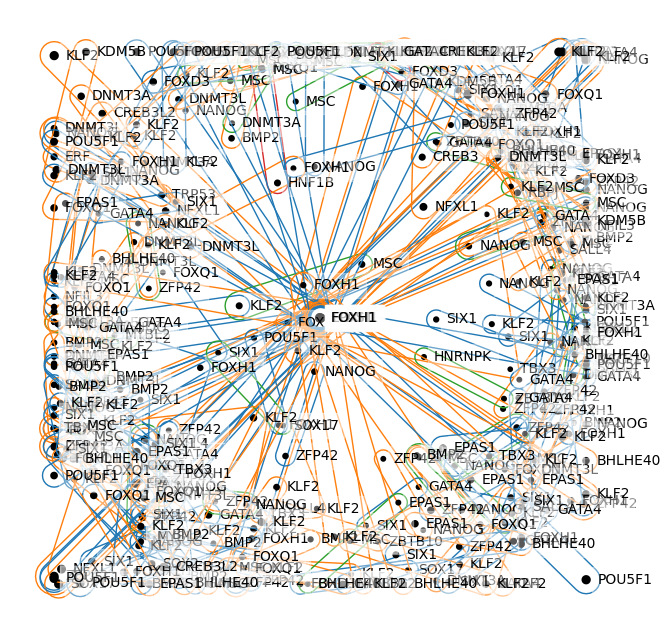

In [42]:
# plt.figure(dpi=360)
for i in range(len(m.hedges)):
    hnx.draw(hnx.classes.Hypergraph.from_numpy_array(m.hedges[i], node_names=m.gene_labels), with_edge_labels=False, node_radius=0.5)
    # hnx.draw(hnx.classes.Hypergraph.from_numpy_array(hedges[i]))
    # if m.hedges[i].shape[1] > 3:
    #     print("yeppp")
# plt.savefig("./hgraphsmall")

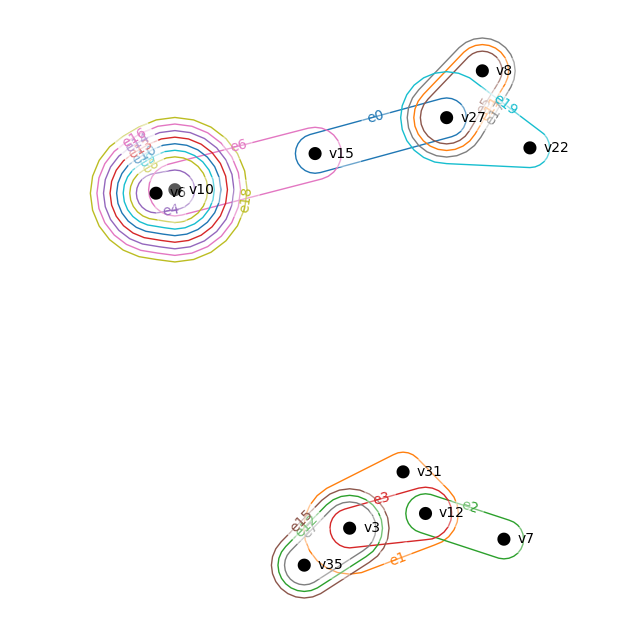

In [63]:
H_test = hnx.classes.Hypergraph.from_numpy_array(M = m.H[:, 60:80])
hnx.drawing.rubber_band.draw(H_test)

# Forming the graph Laplacian

In [49]:
m.set_graph_Laplacian()

# From *On Spectral Clustering: Analysis and an algorithm*

From L-normal:
1. Find k **largest** orthogonal eigen*vectors* (orthogonal to avoid vecs of repeated eigen*values*) of L
2. Make a matrix of 'em, n_genes x k = X
3. Y = Normalize each row of X to have unit length
4. Treat each row of Y as a point in R<sup>k</sup>, cluster into k-clusters via kmeans
5. Assign rows i (you can just use the gene labels vector) to cluster j iff row i in Y was assigned to cluster j 



In [50]:
eigvals, eigvecs = np.linalg.eig(m.L) # looks really good!



In [51]:
# sort eigenvals, then sort eigenvecs by the eigenvals
sorted_indices = np.flip(np.argsort(eigvals))
sorted_eigvals = eigvals[sorted_indices] # sort the vals
sorted_eigvecs = eigvecs[:,sorted_indices] # sorts the columns

In [52]:
# Sanity check to ensure eigenvecs got sorted
eps = 0.0001
min_index = np.argmin(eigvals)
if (np.sum(np.abs(np.abs(eigvecs[:,min_index]) - np.abs(sorted_eigvecs[:,m.n_genes - 1])) < eps) != m.n_genes):
    raise ValueError("Incorrectly sorted eigenvalues")

# Visualizing Eigenvalues for Hyperparameter Selection

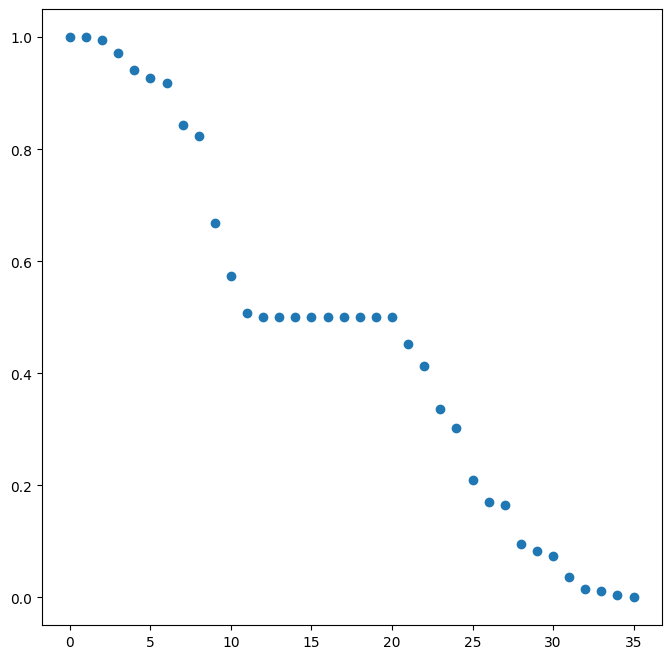

In [53]:
x = np.arange(m.n_genes)
plt.scatter(x, sorted_eigvals)

# Perform the clustering to determine the pathways

In [54]:
k = 2
skip = 0 # Ng et al don't skip anything
kmeans = KMeans(n_clusters=k)
Y = sorted_eigvecs[:, skip:(k + skip)]
kmeans.fit(Y)
labels = kmeans.labels_
np.unique(kmeans.labels_, return_counts=True) # clusters and the number of genes assigned to each cluster


(array([0, 1], dtype=int32), array([34,  2]))

In [55]:
# np.argmin(np.ediff1d(eigvals)) + 1
labels.shape
Y.shape

(36, 2)

In [56]:
clusters = []
for i in range(k):
    genes = np.argwhere(kmeans.labels_ == i).flatten()
    if genes.shape[0] >= 1:
        clusters.append(m.gene_labels[genes])

In [57]:
# TODO: analyze what's in the clusters proper
for c in clusters:
    print(c)
    print("\n")

['SOX2' 'EPAS1' 'FOXQ1' 'KLF2' 'GATA4' 'SOX17' 'ZFP42' 'POU5F1' 'DNMT3A'
 'ELF3' 'NANOG' 'CREB3L2' 'FOXH1' 'NFXL1' 'RBPJ' 'KDM5B' 'BHLHE40' 'BMP2'
 'CREB3' 'SIX1' 'ZBTB10' 'XBP1' 'MSC' 'GATA6' 'HNF1B' 'KLF3' 'DNMT3L'
 'TBX3' 'FOXD3' 'MYBL2' 'NFIL3' 'HNRNPK' 'ELF2' 'SALL4']


['TRP53' 'ERF']


